In [224]:
# Import dependencies
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

In [225]:
#Load data 
df = pd.read_csv('Train.csv')

In [226]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [227]:
df.shape

(8523, 12)

In [228]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [229]:
#Check if There's missing values 
df.isnull().sum().max()

2410

In [230]:
#Info about the data 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Outlet Size and Item Weight have mssing values 

In [231]:
print('Categorical Features are  : ',[col for col in df.columns if df[col].dtype == 'object'])

Categorical Features are  :  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [232]:
#Trait Missing Values
# Imputation Replacing Item Weight with mean Value 
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [233]:
df['Item_Weight'].isnull().sum()

0

In [234]:
mode_outlet_size = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [235]:
missing_values = df['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [236]:
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_outlet_size[x])

In [237]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [238]:
df.isnull().sum().max()

0

In [239]:
sns.set()

Check Numerical Data Stat

In [240]:
print('Numerical Features are  : ',[col for col in df.columns if df[col].dtype != 'object'])

Numerical Features are  :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


<Figure size 432x432 with 0 Axes>

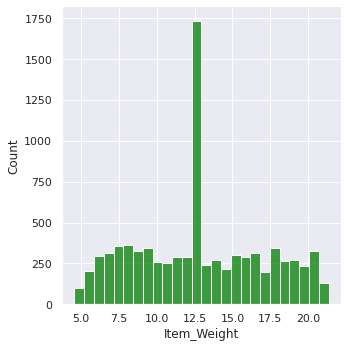

In [241]:
  # Item_Weight Dsitribution
  plt.figure(figsize=(6,6))
  sns.displot(df['Item_Weight'],color='green')
  plt.show()

<Figure size 432x432 with 0 Axes>

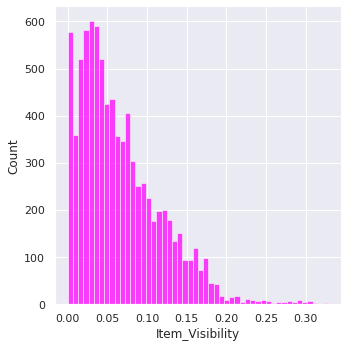

In [242]:
 # Item_Visibility Dsitribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility'],color='magenta')
plt.show()

<Figure size 432x432 with 0 Axes>

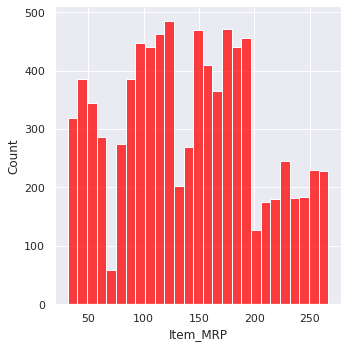

In [243]:
 # Item_Visibility Dsitribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_MRP'],color='red')
plt.show()

<Figure size 432x432 with 0 Axes>

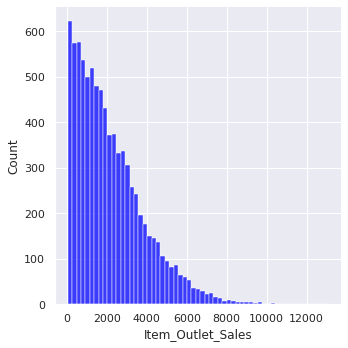

In [244]:
 # Outlet Sales Dsitribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales'],color='blue')
plt.show()

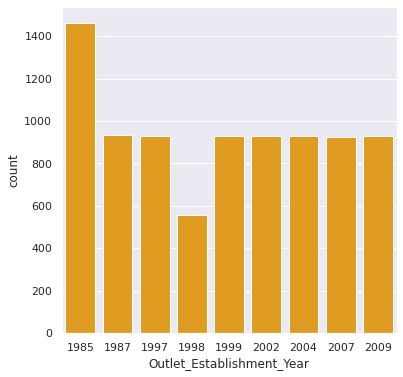

In [245]:
plt.figure(figsize=(6,6))
sns.countplot(x= 'Outlet_Establishment_Year' , data = df,color='orange')
plt.show()

Check Categorical Data Stat:
*   Item_Fat_Content
*   Outlet_Size
* Outlet_Location_Type
* Outlet_Type




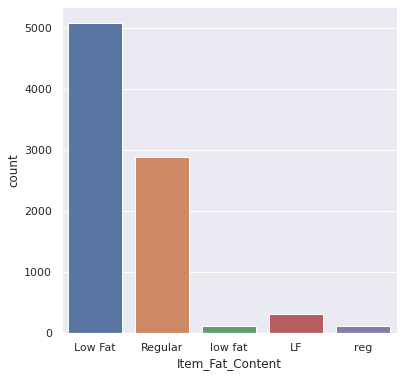

In [246]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content' , data = df)
plt.show()

Lf : Low fat low fat column too 
reg : Regular

In [247]:
df.replace({'Item_Fat_Content' : {'low fat':'Low Fat' , 'LF' : 'Low Fat', 'reg':'Regular'}},inplace=True)

In [248]:
len(df['Item_Fat_Content'].unique())

2

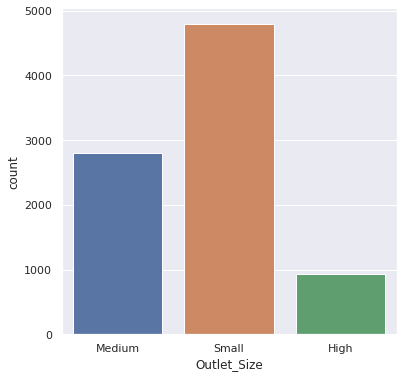

In [249]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size' , data = df)
plt.show()

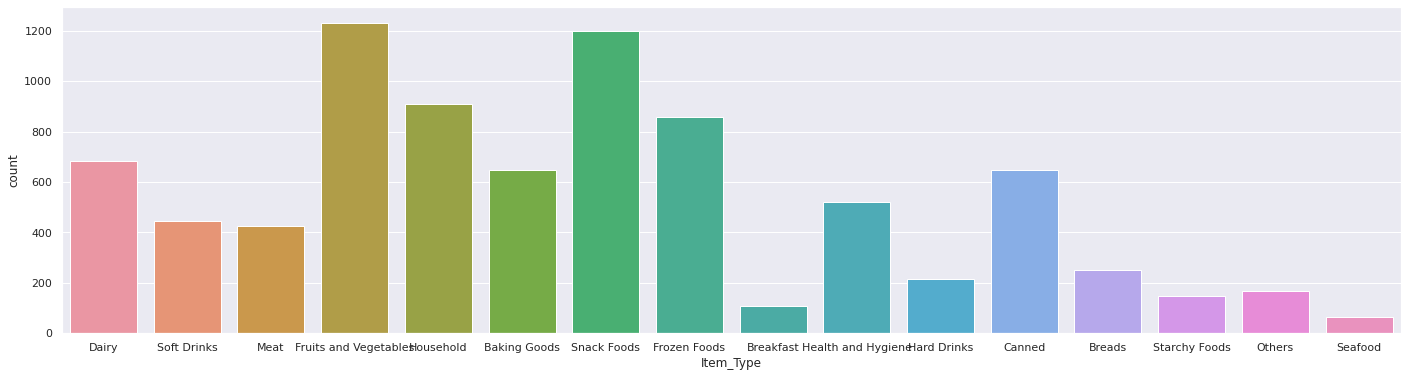

In [250]:
plt.figure(figsize=(24,6))
sns.countplot(x='Item_Type' , data = df)
plt.show()

Encoding the data

In [251]:
encoder = LabelEncoder()

In [252]:
# ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [253]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [254]:
# Split Features and Target 
X = df.drop('Item_Outlet_Sales',axis=1)
Y = df['Item_Outlet_Sales']

In [267]:
#Train Test Split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=.2,random_state=3)

In [268]:
#Create Model and Fit it 
regressor = XGBRegressor()
regressor.fit(X_train,Y_train)

[11:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [269]:
# Evaluation on Train
predictions_train = regressor.predict(X_train)
print('R2 Score on Training Data : ',metrics.r2_score(Y_train,predictions_train))
# Evaluation on test
predictions_test = regressor.predict(X_test)
print('R2 Score on testing Data : ',metrics.r2_score(Y_test,predictions_test))

R2 Score on Training Data :  0.625398091385267
R2 Score on testing Data :  0.6298138968229212
